In [77]:
%load_ext autoreload
%autoreload 2
import os
import glob
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
import sys
sys.path.append("../../Code")
import vader
import settings as s
import utils 
import seaborn as sns 
import afinns as af
import s140
import opinion_lexicon as op
import so_cal as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [3]:
reviews = pd.read_csv(os.path.join('..','2','len_lang_restrict_reviews.csv'), index_col=0)

# Sentiment analysis tools 

# Afinn - overall

In [6]:
reviews['afinn'] = reviews.comments.map(lambda x: af.get_score(x))

In [33]:
reviews.to_csv('reviews_with_sent.csv')

## Vader - Overall

In [10]:
reviews['vader'] = reviews.comments.map(lambda x: vader.get_score(x))

# S140

In [18]:
s140.save_review_s140(reviews,'reviews')

In [19]:
s140_dir = "s140/overall/out/"

In [24]:
reviews = s140.read_s140_scores(s140_dir, reviews)

225484 Index(['string'], dtype='object')


# SO-CAL

In [23]:
sc.save_review_so_cal(reviews, 'comments')

In [43]:
reviews = sc.get_overall_sent('so_cal/overall/out/file_sentiment.csv', reviews)

## Add opinion Lexicon Scores

In [28]:
reviews['opinion_bow'] = reviews.comments.map(lambda x: op.get_score(x))

In [29]:
reviews['opinion_freq'] = reviews.comments.map(lambda x: op.get_score(x, "freq"))

### AFINN-Sentence Level

In [31]:
reviews['Affin-sentence'] = reviews.comments.map(lambda x: af.get_sentence_level_sent(x))

### Vader sentence Level

In [34]:
reviews['Vader-sentence'] = reviews.comments.map(lambda x: vader.get_sentence_level_sent(x))

### Opinion Lexion BOW Sentence Level 

In [36]:
reviews['opinion_bow-sentence'] = reviews.comments.map(lambda x: op.get_sentence_level_sent(x))

### Opinion Lexion Freq Sentence Level 

In [37]:
reviews['opinion_freq-sentence'] = reviews.comments.map(lambda x: op.get_sentence_level_sent(x, "freq"))

### Sentiment-140 sentence Level

In [41]:
s140.save_review_sentence_short(reviews)

In [46]:
s140_dir = 's140/sent/out/'

In [79]:
reviews['s140-sentence'] = s140.get_sentence_level_sent(s140_dir, reviews)

### SO_CAL sentence level

In [82]:
sc.save_review_sentence(reviews, 'comments')

In [84]:
so_cal_dir = 'so_cal/sent/out/file_sentiment.csv'

In [129]:
reviews['so_cal-sentence'] = sc.get_sentence_level_sent(so_cal_dir, reviews)

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
reviews[reviews['so_cal-sentence'].isnull()]

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,hostCancelled,token_len,num_of_sents,google_langs,google_langs_conf,langdetect_langs,langdetect_langs_conf,other_langs,translated,afinn,vader,s140,opinion_bow,opinion_freq,Affin-sentence,Vader-sentence,opinion_bow-sentence,opinion_freq-sentence,so_cal,s140-sentence,so_cal-sentence,sc
23259,47901,129387822,2017-01-30,87776088,195089,948075,"We stayed at Alon's for two weeks. First of all, the communication with Alon was great, he always answered very quickly and was very accommodating for early check-in and late check-out (Thanks ag...",N,319,17,en,1.0,en,0.571427,"['fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr']","We stayed at Alon's for two weeks.First of all, the communication with Alon was great, he always answered very quickly and was very accommodating for early check-in and late check-out (Thanks agai...",18.0,0.9816,4,0.048485,0.021944,"[0.0, 5.0, 0.0, 3.0, 3.0, 1.0, 8.0, -1.0, 4.0, 0.0, -2.0, -2.0, -2.0, 1.0, 0.0, -2.0, 2.0]","[0.0, 0.6588, 0.3802, 0.4404, 0.5719, 0.3182, 0.886, -0.4854, 0.7955, 0.0, -0.128, 0.0, -0.128, 0.3182, 0.4466, -0.128, 0.4199]","[0.0, 0.08333333333333333, 0.0, 0.14285714285714285, 0.2, 0.0, 0.4, -0.14285714285714285, 0.2, 0.0, -0.125, 0.0, -0.043478260869565216, 0.04, 0.0, -0.043478260869565216, 0.05555555555555555]","[0.0, 0.03571428571428571, 0.0, 0.09090909090909091, 0.09090909090909091, 0.0, 0.18181818181818182, -0.08333333333333333, 0.09090909090909091, 0.0, -0.125, 0.0, -0.03571428571428571, 0.03448275862...",NaN,"[2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2]",NaN,False


In [132]:
reviews.to_csv('reviews_with_sent.csv')

# Needs to be moved

# TEST Translated Comment

## AFINN

In [168]:
eng_reviews['trans-afinn'] = [afinn.score(x) if x != None else x for x in eng_reviews.translated]

## VADER

In [174]:
eng_reviews['trans-vader'] = [analyzer.polarity_scores(x)['compound'] if x != None else x for x in eng_reviews.translated]

### How many unique languages detected

In [30]:
len(reviews['langs'].unique())

44

### Which Reviews have languages that are unknown?

In [31]:
reviews[reviews['langs'] =='unk'].head()

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,len,num_of_sents,langs,langs_conf
3895,6809,217296687,2017-12-08,4894631,15711,61491,👌🏼,1,1,unk,0.0
6399,12279,146656895,2017-04-23,113471646,27024,3227,-,1,1,unk,0.0
7565,16605,7913554,2013-10-08,6588502,41959,140272,:(,1,1,unk,0.0
7706,16746,127177546,2017-01-16,101474773,41959,140272,:),1,1,unk,0.0
8675,19047,192543354,2017-09-10,142858402,47199,212722,.,1,1,unk,0.0


In [32]:
len(reviews[reviews['num_of_sents'] > 1])

384957

### Restrict greater than 5 tokens/words and greater than 1 sentence 

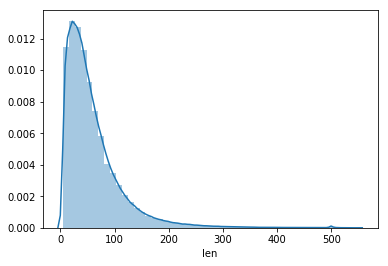

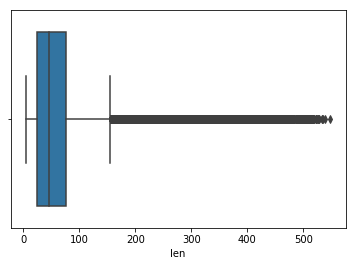

Average: 60.172471131639725
Min: 5
Max: 548
Variance: 2915.79852160788
Std deviation: 53.99813442710665


In [178]:
print_desc_sent(eng_reviews, 'len')

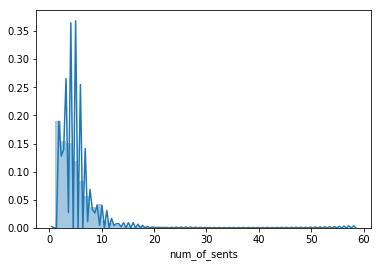

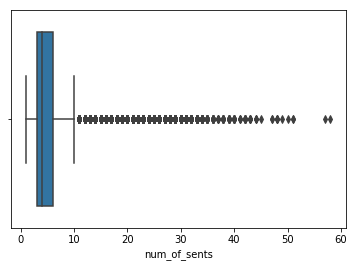

Average: 4.774716215270487
Min: 1
Max: 58
Variance: 10.381879310970403
Std deviation: 3.222092380887054


In [177]:
print_desc_sent(eng_reviews, 'num_of_sents')

### Get Secondary Languages

In [92]:
from googletrans import Translator

In [116]:
def detect_other_langs(com):
    sents = sent_tokenize(com)
    other_langs = []
    for i,s in zip(range(len(sents)), sents):
        try:
            first = str(detect_langs(s)[0]).split(':')
            if len(first)> 1 and first[0] != 'en' and float(first[1]) > 0.999:
                print('Translating')
                other_langs.append(first[0])
                translator = Translator()
                translated = translator.translate(s, dest='en')
                sents[i] = translated.text
        except:
            continue;
    return (other_langs, "".join(sents)) if len(other_langs) > 0 else (0, None)

In [ ]:
eng_reviews = get_other_langs(eng_reviews)

In [122]:
eng_reviews.to_csv('../Data/finalised/reviews.csv')

In [123]:
len(eng_reviews)

357225

In [132]:
utils.get_comments(eng_reviews, 'id', '268306359', 'comments')

"It's very good location. The household is very considerate. The room is very comfortable with all furcilities. Make my stay enjoyable"

In [133]:
len(eng_reviews[eng_reviews['other_langs'] != 0])

20027

# Spelling corrector

In [149]:
from spellchecker import SpellChecker
keys = utils.tokenize(utils.get_comments(reviews, 'id', 129387822, 'comments').lower())
spell = SpellChecker()
# find those words that may be misspelled
misspelled = spell.unknown(keys)

In [150]:
misspelled

{'15',
 '15mn',
 '2',
 '20',
 '30',
 '30mn',
 'adresses',
 "alon's",
 'arrangeant',
 'assuré',
 'avons',
 'bonnes',
 'bruyant',
 'chauffage',
 'collectif',
 'conforme',
 "d'abord",
 "d'alon",
 'donné',
 'exactement',
 'excellente',
 'grâce',
 'gênant',
 'idéal',
 "it's",
 "l'appart'",
 "l'appartement",
 "l'ensemble",
 "l'immeuble",
 "l'on",
 'lequel',
 'littéralement',
 'midtwon',
 'métro',
 'même',
 "n'a",
 'passait',
 'plusieurs',
 'profiter',
 'quand',
 'rapidement',
 'recherchions',
 'restos',
 'restés',
 'rien',
 'répond',
 "s'est",
 'semaines',
 'sortir',
 'système',
 'tard',
 "that's",
 'toujours',
 'très',
 'tôt',
 'vaisselle',
 'vraiment',
 'à',
 'étaient',
 'était',
 'étions',
 'été'}

In [151]:
corrections = {}
for word in misspelled:
    corrections[word] = spell.correction(word)
    

In [152]:
corrections

{'15': 'p5',
 '15mn': 'damn',
 '2': 'a',
 '20': 'm0',
 '30': 'm0',
 '30mn': 'damn',
 'adresses': 'addresses',
 "alon's": 'along',
 'arrangeant': 'arrangement',
 'assuré': 'assure',
 'avons': 'avon',
 'bonnes': 'bones',
 'bruyant': 'bryant',
 'chauffage': 'chauffage',
 'collectif': 'collection',
 'conforme': 'conform',
 "d'abord": 'debord',
 "d'alon": 'dralon',
 'donné': 'donna',
 'exactement': 'excitement',
 'excellente': 'excellent',
 'grâce': 'grace',
 'gênant': 'grant',
 'idéal': 'ideal',
 "it's": 'its',
 "l'appart'": "l'appart'",
 "l'appartement": "l'appartement",
 "l'ensemble": 'ensemble',
 "l'immeuble": "l'immeuble",
 "l'on": 'lion',
 'lequel': 'sequel',
 'littéralement': 'littéralement',
 'midtwon': 'midtown',
 'métro': 'metro',
 'même': 'mime',
 "n'a": "n't",
 'passait': 'passat',
 'plusieurs': 'plusieurs',
 'profiter': 'profited',
 'quand': 'quad',
 'rapidement': 'rapidement',
 'recherchions': 'recherchions',
 'restos': 'rests',
 'restés': 'rests',
 'rien': 'risen',
 'répond':

In [140]:
misspelled

{'furcilities', 'heire', "something'"}

In [1]:
corrections

NameError: name 'corrections' is not defined